In [1]:
import numpy as bnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('questions.csv')
df.shape

(404351, 6)

In [4]:
df.dropna(inplace=True)

In [5]:
new_df=df.sample(30000,random_state=2)
new_df.shape

(30000, 6)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
302477,302477,594007,594008,What are kalman filters used for?,What are examples of filters used in a home?,0
369857,369857,723787,723788,How do Relationship work?,What matters in the life most dignity or money?,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132567,132567,262555,262556,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...,1


In [8]:
import re
from bs4 import BeautifulSoup

In [9]:

def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [10]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
302477,302477,594007,594008,what are kalman filters used for,what are examples of filters used in a home,0
369857,369857,723787,723788,how do relationship work,what matters in the life most dignity or money,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1
132567,132567,262555,262556,does google maps account for change in speed w...,what speed does google maps assume when it gen...,1


## Basic Feature Engineering

In [12]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [13]:
new_df['q1_num_words']=new_df['question1'].apply(lambda x:len(x.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda x:len(x.split(" ")))

In [14]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))

    return len(w1&  w2)

In [15]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [16]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))

    return (len(w1)+len(w2))

In [17]:
new_df['word_total']=new_df.apply(total_words,axis=1)

In [18]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
302477,302477,594007,594008,what are kalman filters used for,what are examples of filters used in a home,0,32,43,6,9,4,15,0.27
369857,369857,723787,723788,how do relationship work,what matters in the life most dignity or money,0,24,46,4,9,0,13,0.00
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,91,90,20,20,15,32,0.47
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18,0.33
132567,132567,262555,262556,does google maps account for change in speed w...,what speed does google maps assume when it gen...,1,70,83,12,14,6,26,0.23


## After Preprocessing with Basic Feature Engineering

In [20]:
ques_df=new_df[['question1','question2']]
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])

from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)

import numpy as np
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

final_df=pd.concat([final_df,temp_df],axis=1)

X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

X_train.columns = X_train.columns.astype(str)
clf.fit(X_train,y_train)

X_test.columns = X_test.columns.astype(str)
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7475

## Advanced Feature Engineering

### Token Features

In [21]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/annavarambhavana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [23]:
token_features = new_df.apply(fetch_token_features, axis=1)

In [24]:
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
302477,302477,594007,594008,what are kalman filters used for,what are examples of filters used in a home,0,32,43,6,9,...,15,0.27,0.666644,0.499988,0.666644,0.399992,0.666656,0.444440,0.0,1.0
369857,369857,723787,723788,how do relationship work,what matters in the life most dignity or money,0,24,46,4,9,...,13,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,91,90,20,20,...,32,0.47,0.899991,0.899991,0.999980,0.999980,0.874995,0.874995,1.0,1.0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,18,0.33,0.749981,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0
132567,132567,262555,262556,does google maps account for change in speed w...,what speed does google maps assume when it gen...,1,70,83,12,14,...,26,0.23,0.374995,0.333330,0.749981,0.599988,0.499996,0.428568,0.0,0.0


In [26]:
import distance
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [27]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [28]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
302477,302477,594007,594008,what are kalman filters used for,what are examples of filters used in a home,0,32,43,6,9,...,0.499988,0.666644,0.399992,0.666656,0.444440,0.0,1.0,3.0,7.5,0.424242
369857,369857,723787,723788,how do relationship work,what matters in the life most dignity or money,0,24,46,4,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.0,6.5,0.080000
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,91,90,20,20,...,0.899991,0.999980,0.999980,0.874995,0.874995,1.0,1.0,0.0,16.0,0.802198
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599988,0.749981,0.599988,0.749991,0.599994,0.0,1.0,2.0,9.0,0.355556
132567,132567,262555,262556,does google maps account for change in speed w...,what speed does google maps assume when it gen...,1,70,83,12,14,...,0.333330,0.749981,0.599988,0.499996,0.428568,0.0,0.0,2.0,13.0,0.253521


In [29]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [30]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [31]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
302477,302477,594007,594008,what are kalman filters used for,what are examples of filters used in a home,0,32,43,6,9,...,0.444440,0.0,1.0,3.0,7.5,0.424242,69,72,61,79
369857,369857,723787,723788,how do relationship work,what matters in the life most dignity or money,0,24,46,4,9,...,0.000000,0.0,0.0,5.0,6.5,0.080000,23,33,34,34
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,91,90,20,20,...,0.874995,1.0,1.0,0.0,16.0,0.802198,99,99,99,99
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599994,0.0,1.0,2.0,9.0,0.355556,74,75,74,89
132567,132567,262555,262556,does google maps account for change in speed w...,what speed does google maps assume when it gen...,1,70,83,12,14,...,0.428568,0.0,0.0,2.0,13.0,0.253521,50,54,71,72


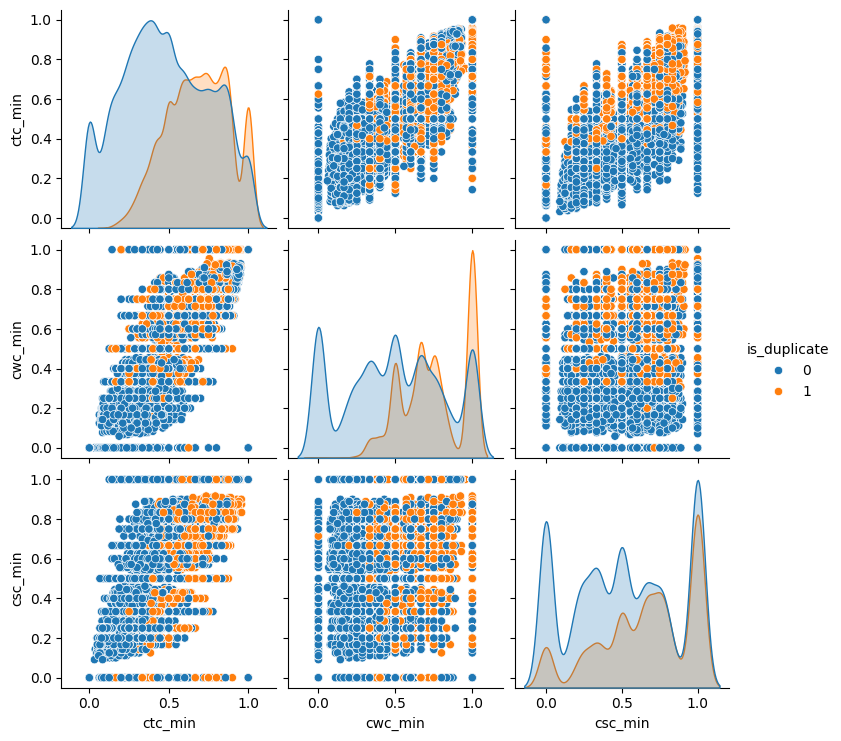

In [32]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

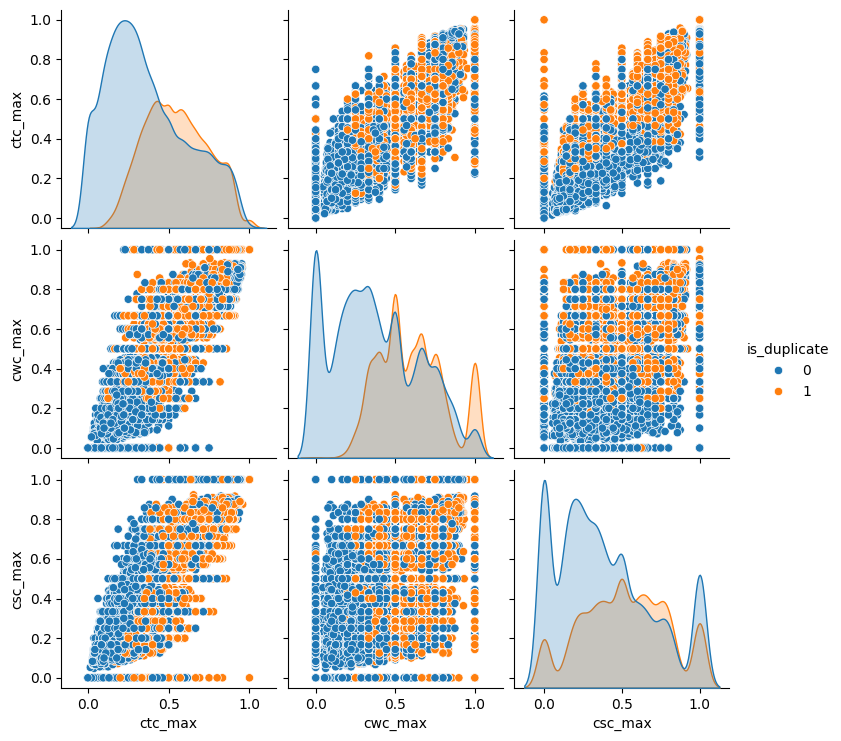

In [33]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

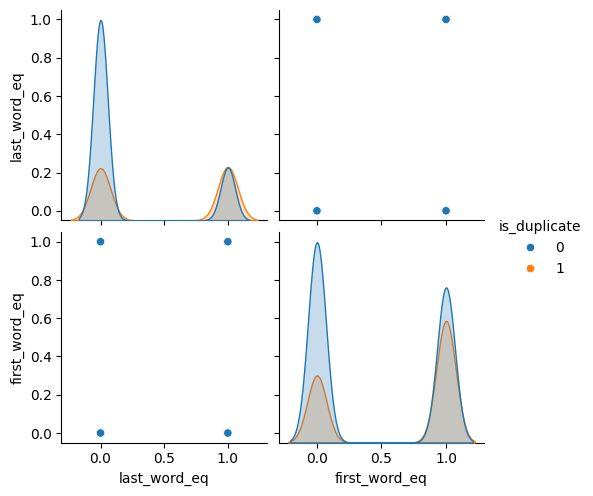

In [34]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

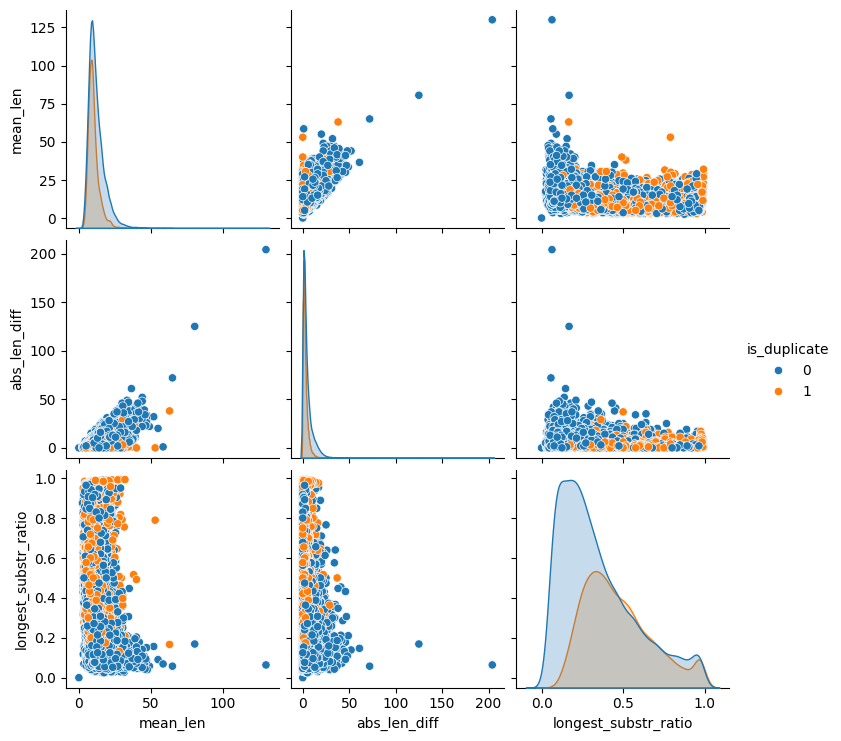

In [35]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

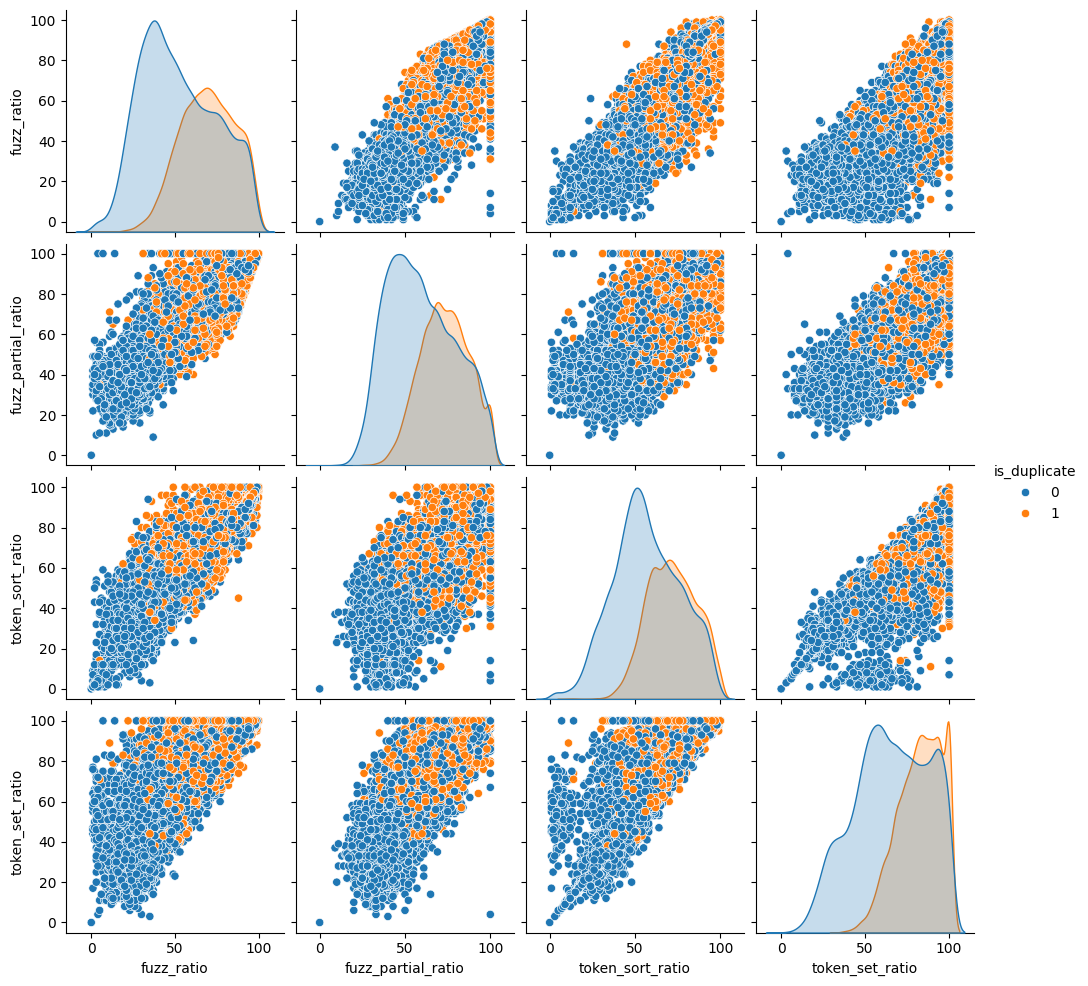

In [36]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [37]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [38]:
"""from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)"""

"from sklearn.manifold import TSNE\n\ntsne2d = TSNE(\n    n_components=2,\n    init='random', # pca\n    random_state=101,\n    method='barnes_hut',\n    n_iter=1000,\n    verbose=2,\n    angle=0.5\n).fit_transform(X)"

In [39]:
"""x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
import seaborn as sns

sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])
"""

'x_df = pd.DataFrame({\'x\':tsne2d[:,0], \'y\':tsne2d[:,1] ,\'label\':y})\n\n# draw the plot in appropriate place in the grid\nimport seaborn as sns\n\nsns.lmplot(data=x_df, x=\'x\', y=\'y\', hue=\'label\', fit_reg=False, height=8, palette="Set1", markers=[\'s\', \'o\'])\n'

In [40]:
"""tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)"""

"tsne3d = TSNE(\n    n_components=3,\n    init='random', # pca\n    random_state=101,\n    method='barnes_hut',\n    n_iter=1000,\n    verbose=2,\n    angle=0.5\n).fit_transform(X)"

In [41]:
"""import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')"""

"import plotly.graph_objs as go\nimport plotly.tools as tls\nimport plotly.offline as py\npy.init_notebook_mode(connected=True)\n\ntrace1 = go.Scatter3d(\n    x=tsne3d[:,0],\n    y=tsne3d[:,1],\n    z=tsne3d[:,2],\n    mode='markers',\n    marker=dict(\n        sizemode='diameter',\n        color = y,\n        colorscale = 'Portland',\n        colorbar = dict(title = 'duplicate'),\n        line=dict(color='rgb(255, 255, 255)'),\n        opacity=0.75\n    )\n)\n\ndata=[trace1]\nlayout=dict(height=800, width=800, title='3d embedding with engineered features')\nfig=dict(data=data, layout=layout)\npy.iplot(fig, filename='3DBubble')"

In [42]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
302477,what are kalman filters used for,what are examples of filters used in a home
369857,how do relationship work,what matters in the life most dignity or money
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete,why does quora detect my question as an incomp...
132567,does google maps account for change in speed w...,what speed does google maps assume when it gen...


In [43]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
302477,0,32,43,6,9,4,15,0.27,0.666644,0.499988,...,0.444440,0.0,1.0,3.0,7.5,0.424242,69,72,61,79
369857,0,24,46,4,9,0,13,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,5.0,6.5,0.080000,23,33,34,34
4665,0,91,90,20,20,15,32,0.47,0.899991,0.899991,...,0.874995,1.0,1.0,0.0,16.0,0.802198,99,99,99,99
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,0.599994,0.0,1.0,2.0,9.0,0.355556,74,75,74,89
132567,1,70,83,12,14,6,26,0.23,0.374995,0.333330,...,0.428568,0.0,0.0,2.0,13.0,0.253521,50,54,71,72


In [44]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/annavarambhavana/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])


cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [46]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [47]:

final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302477,0,32,43,6,9,4,15,0.27,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
369857,0,24,46,4,9,0,13,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4665,0,91,90,20,20,15,32,0.47,0.899991,0.899991,...,0,0,0,0,0,0,0,0,0,0
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0
132567,1,70,83,12,14,6,26,0.23,0.374995,0.333330,...,0,0,0,0,0,0,0,0,0,0


In [48]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7898333333333334

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7853333333333333

In [51]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [52]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [53]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [54]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [55]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [56]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [57]:
q1 = 'Where is the capital of India?'
q2 = 'What is  capital of India?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [58]:
rf.predict(query_point_creator(q1,q2))

array([1])

In [59]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [60]:
import nltk
import pickle

# Download NLTK stopwords if not already done
nltk.download('stopwords')

from nltk.corpus import stopwords

# Get the list of stopwords
stop_words = stopwords.words('english')

# Save stopwords to a pickle file
with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stop_words, f)

print("stopwords.pkl file created successfully!")


stopwords.pkl file created successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/annavarambhavana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
